#Import all necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.utils import resample


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

Read the data into dataframe & EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

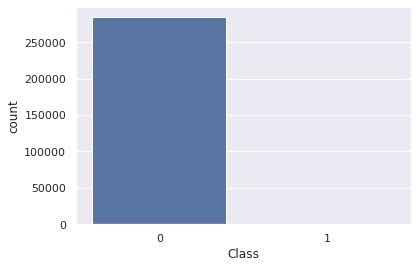

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Class", data=df)

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

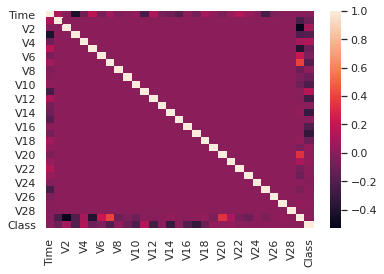

In [ ]:
sns.heatmap(df.corr())

# Data Preprocessing

In [ ]:
# Convert the time to different period in a day
df["Time"] = df["Time"].apply(lambda x : x / 3600 % 24)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Scale the independent variables
y = df["Class"].values  # target attributes
X = df.drop(["Class"], axis=1) # input attributes


x_scale = preprocessing.MinMaxScaler().fit_transform(X.values)



#Standard ML training and evaluation 

In [ ]:
# reduce the size of the data as it takes too long for training
reduce_x, large_x, reduce_y, large_y = train_test_split(x_scale, y,
                                                  test_size=0.2, stratify=y)

# data splitting
train_x, val_x, train_y, val_y = train_test_split(reduce_x, reduce_y,
                                                  test_size=0.4, stratify=reduce_y)


## Supervised ML techniques

### DT

In [ ]:
# Decision Tree
DT_clf = DecisionTreeClassifier().fit(train_x, train_y)
# tree.plot_tree(DT_clf)

In [ ]:
# DT Performance Evaluation
pred_y_DT = DT_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_DT))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_DT, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_DT))
precision = precision_score(val_y, pred_y_DT)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_DT)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_DT))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_DT))





Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90980
           1       0.75      0.78      0.77       158

    accuracy                           1.00     91138
   macro avg       0.87      0.89      0.88     91138
weighted avg       1.00      1.00      1.00     91138


Confusion Matrix: 
 [[  124    34]
 [   42 90938]]
Accuracy Score:  0.9991660997608023
Precision Score:  0.7469879518072289
Recall Score:  0.7848101265822784
F1 Score:  0.7654320987654321
ROC AUC:  0.8921742433307085


### LR

In [ ]:
# Logistic regression
LR_clf = LogisticRegression().fit(train_x, train_y)


In [ ]:
# LR Performance Evaluation
pred_y_LR = LR_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_LR))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_LR, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_LR))
precision = precision_score(val_y, pred_y_LR)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_LR)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_LR))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_LR))





Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90980
           1       0.83      0.57      0.68       158

    accuracy                           1.00     91138
   macro avg       0.92      0.78      0.84     91138
weighted avg       1.00      1.00      1.00     91138


Confusion Matrix: 
 [[   90    68]
 [   18 90962]]
Accuracy Score:  0.9990563760451184
Precision Score:  0.8333333333333334
Recall Score:  0.569620253164557
F1 Score:  0.6766917293233082
ROC AUC:  0.7847112037420938


### SVM

In [ ]:
# Support Vector Machine
SVM_clf = svm.SVC().fit(train_x, train_y)


In [ ]:
# SVM Performance Evaluation
pred_y_SVM = SVM_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_SVM))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_SVM, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_SVM))
precision = precision_score(val_y, pred_y_SVM)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_SVM)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_SVM))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_SVM))




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90980
           1       0.82      0.80      0.81       158

    accuracy                           1.00     91138
   macro avg       0.91      0.90      0.90     91138
weighted avg       1.00      1.00      1.00     91138


Confusion Matrix: 
 [[  126    32]
 [   27 90953]]
Accuracy Score:  0.999352630077465
Precision Score:  0.8235294117647058
Recall Score:  0.7974683544303798
F1 Score:  0.8102893890675241
ROC AUC:  0.8985857929549129


### KNN

In [ ]:
# K Nearest Neighbors
KNN_clf = KNeighborsClassifier(n_neighbors=3).fit(train_x, train_y)

In [ ]:
# KNN Performance Evaluation
pred_y_KNN = KNN_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_KNN))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_KNN, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_KNN))
precision = precision_score(val_y, pred_y_KNN)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_KNN)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_KNN))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_KNN))




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90980
           1       0.95      0.72      0.82       158

    accuracy                           1.00     91138
   macro avg       0.97      0.86      0.91     91138
weighted avg       1.00      1.00      1.00     91138


Confusion Matrix: 
 [[  114    44]
 [    6 90974]]
Accuracy Score:  0.9994513814215804
Precision Score:  0.95
Recall Score:  0.7215189873417721
F1 Score:  0.8201438848920861
ROC AUC:  0.8607265193908245


### RF

In [ ]:
# Random Forrest
RF_clf = RandomForestClassifier().fit(train_x, train_y)

In [ ]:
# RF Performance Evaluation
pred_y_RF = RF_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_RF))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_RF, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_RF))
precision = precision_score(val_y, pred_y_RF)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_RF)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_RF))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_RF))




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90980
           1       0.93      0.78      0.85       158

    accuracy                           1.00     91138
   macro avg       0.97      0.89      0.92     91138
weighted avg       1.00      1.00      1.00     91138


Confusion Matrix: 
 [[  123    35]
 [    9 90971]]
Accuracy Score:  0.9995172156509908
Precision Score:  0.9318181818181818
Recall Score:  0.7784810126582279
F1 Score:  0.8482758620689654
ROC AUC:  0.8891910449090217


## Unsupervised ML techniques

### K means

In [ ]:
## K means
Kmeans_clf = KMeans().fit(train_x)

In [ ]:
# Predict the top 3% farthest points from center as anomaly
clusters_y_Kmeans = Kmeans_clf.predict(val_x)

clusters_centers=Kmeans_clf.cluster_centers_
dist = [np.linalg.norm(x-y) for x,y in zip(val_x,clusters_centers[clusters_y_Kmeans])]

pred_y_Kmeans=np.array(dist)
pred_y_Kmeans[dist>=np.percentile(dist,97)]=1
pred_y_Kmeans[dist<np.percentile(dist,97)]=0

# Kmeans Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_Kmeans))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_Kmeans, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_Kmeans))
precision = precision_score(val_y, pred_y_Kmeans)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_Kmeans)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_Kmeans))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_Kmeans))




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     90980
           1       0.05      0.85      0.09       158

    accuracy                           0.97     91138
   macro avg       0.52      0.91      0.54     91138
weighted avg       1.00      0.97      0.98     91138


Confusion Matrix: 
 [[  134    24]
 [ 2601 88379]]
Accuracy Score:  0.9711975246329742
Precision Score:  0.048994515539305304
Recall Score:  0.8481012658227848
F1 Score:  0.0926374006221915
ROC AUC:  0.9097562825047096


### OCSVM

In [ ]:
## One-Class SVM
OCSVM_clf = OneClassSVM(gamma='auto', nu=0.1).fit(train_x[train_y==0])

In [ ]:
# convert from class -1 1 to 1 0
pred_y_OCSVM = OCSVM_clf.predict(val_x)
pred_y_OCSVM [pred_y_OCSVM ==1] = 0
pred_y_OCSVM [pred_y_OCSVM ==-1] = 1

# One-Class SVM Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_OCSVM))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_OCSVM, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_OCSVM))
precision = precision_score(val_y, pred_y_OCSVM)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_OCSVM)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_OCSVM))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_OCSVM))




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     90980
           1       0.01      0.75      0.03       158

    accuracy                           0.90     91138
   macro avg       0.51      0.82      0.49     91138
weighted avg       1.00      0.90      0.95     91138


Confusion Matrix: 
 [[  118    40]
 [ 8960 82020]]
Accuracy Score:  0.9012486558844829
Precision Score:  0.012998457810090328
Recall Score:  0.7468354430379747
F1 Score:  0.025552187093980078
ROC AUC:  0.8241761299604029


### Isolation Forest

In [ ]:
## Isolation Forest
IsoF_clf = IsolationForest().fit(train_x[train_y==0])

In [ ]:
# convert from class -1 1 to 1 0
pred_y_IsoF = IsoF_clf.predict(val_x)
pred_y_IsoF [pred_y_IsoF ==1] = 0
pred_y_IsoF [pred_y_IsoF ==-1] = 1

# Isolation Forest Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_IsoF))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_IsoF, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_IsoF))
precision = precision_score(val_y, pred_y_IsoF)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_IsoF)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_IsoF))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_IsoF))




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     90980
           1       0.03      0.81      0.06       158

    accuracy                           0.96     91138
   macro avg       0.52      0.88      0.52     91138
weighted avg       1.00      0.96      0.98     91138


Confusion Matrix: 
 [[  128    30]
 [ 3673 87307]]
Accuracy Score:  0.9593693080822489
Precision Score:  0.03367534859247567
Recall Score:  0.810126582278481
F1 Score:  0.06466279363475626
ROC AUC:  0.884877536028227


## Hybrid Model

### RF --> K means (supervised then unsupervised)

In [ ]:
# those instance predicted as normal by rf will go through
# 2nd prediction by using K means

clusters_y_RF_Kmeans = Kmeans_clf.predict(val_x[pred_y_RF==0])

dist_RF_Kmeans = [np.linalg.norm(x-y) for x,y in zip(val_x[pred_y_RF==0]
                                           ,clusters_centers[clusters_y_RF_Kmeans])]

pred_y_RF_Kmeans =np.array(dist_RF_Kmeans)
pred_y_RF_Kmeans [dist_RF_Kmeans>=np.percentile(dist_RF_Kmeans,97)]=1
pred_y_RF_Kmeans [dist_RF_Kmeans<np.percentile(dist_RF_Kmeans,97)]=0


pred_y_RF[pred_y_RF==0] = pred_y_RF_Kmeans 



In [ ]:
# RF_K means Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_RF))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_RF, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_RF))
precision = precision_score(val_y, pred_y_RF)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_RF)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_RF))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_RF))



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     90980
           1       0.05      0.87      0.09       158

    accuracy                           0.97     91138
   macro avg       0.52      0.92      0.54     91138
weighted avg       1.00      0.97      0.98     91138


Confusion Matrix: 
 [[  138    20]
 [ 2725 88255]]
Accuracy Score:  0.9698808400447673
Precision Score:  0.048201187565490744
Recall Score:  0.8734177215189873
F1 Score:  0.0913604766633565
ROC AUC:  0.9217330418982055


### KNN --> K means (supervised then unsupervised)

In [ ]:
# those instance predicted as normal by knn will go through
# 2nd prediction by using K means

clusters_y_KNN_Kmeans = Kmeans_clf.predict(val_x[pred_y_KNN==0])

dist_KNN_Kmeans = [np.linalg.norm(x-y) for x,y in zip(val_x[pred_y_KNN==0]
                                           ,clusters_centers[clusters_y_KNN_Kmeans])]

pred_y_KNN_Kmeans =np.array(dist_KNN_Kmeans)
pred_y_KNN_Kmeans [dist_KNN_Kmeans>=np.percentile(dist_KNN_Kmeans,97)]=1
pred_y_KNN_Kmeans [dist_KNN_Kmeans<np.percentile(dist_KNN_Kmeans,97)]=0


pred_y_KNN[pred_y_KNN==0] = pred_y_KNN_Kmeans 



In [ ]:
# KNN_K means Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_KNN))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_KNN, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_KNN))
precision = precision_score(val_y, pred_y_KNN)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_KNN)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_KNN))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_KNN))


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     90980
           1       0.05      0.85      0.09       158

    accuracy                           0.97     91138
   macro avg       0.52      0.91      0.54     91138
weighted avg       1.00      0.97      0.98     91138


Confusion Matrix: 
 [[  134    24]
 [ 2717 88263]]
Accuracy Score:  0.9699247295310408
Precision Score:  0.04700105226236408
Recall Score:  0.8481012658227848
F1 Score:  0.08906613492854769
ROC AUC:  0.909118779756853


### K means --> RF (unsupervised then supervised)

In [ ]:
# those instance predicted as fraud by K means will go through
# 2nd prediction by using rf

pred_y_Kmeans_RF = pred_y_Kmeans.copy()

pred_y_Kmeans_RF[pred_y_Kmeans_RF==1] = RF_clf.predict(val_x[pred_y_Kmeans_RF==1])



In [ ]:
# K means_RF Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_Kmeans_RF))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_Kmeans_RF, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_Kmeans_RF))
precision = precision_score(val_y, pred_y_Kmeans_RF)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_Kmeans_RF)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_Kmeans_RF))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_Kmeans_RF))


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90980
           1       0.93      0.75      0.83       158

    accuracy                           1.00     91138
   macro avg       0.96      0.88      0.92     91138
weighted avg       1.00      1.00      1.00     91138


Confusion Matrix: 
 [[  119    39]
 [    9 90971]]
Accuracy Score:  0.9994733261647173
Precision Score:  0.9296875
Recall Score:  0.7531645569620253
F1 Score:  0.8321678321678321
ROC AUC:  0.8765328170609203


### K means --> KNN (unsupervised then supervised)

In [ ]:
# those instance predicted as fraud by K means will go through
# 2nd prediction by using KNN

pred_y_Kmeans_KNN = pred_y_Kmeans.copy()

pred_y_Kmeans_KNN[pred_y_Kmeans_KNN==1] = KNN_clf.predict(val_x[pred_y_Kmeans_KNN==1])


In [ ]:
# K means_KNN Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_Kmeans_KNN))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_Kmeans_KNN, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_Kmeans_KNN))
precision = precision_score(val_y, pred_y_Kmeans_KNN)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_Kmeans_KNN)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_Kmeans_KNN))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_Kmeans_KNN))


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90980
           1       0.96      0.72      0.82       158

    accuracy                           1.00     91138
   macro avg       0.98      0.86      0.91     91138
weighted avg       1.00      1.00      1.00     91138


Confusion Matrix: 
 [[  114    44]
 [    5 90975]]
Accuracy Score:  0.9994623537931488
Precision Score:  0.957983193277311
Recall Score:  0.7215189873417721
F1 Score:  0.8231046931407943
ROC AUC:  0.8607320151041681


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
